In [23]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['GaltonFamilies.csv']
galton = ds.to_dataframe()

In [24]:
galton.head()

,Case,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1,78.5,67.0,75.43,4,1,male,73.2
1,2,1,78.5,67.0,75.43,4,2,female,69.2
2,3,1,78.5,67.0,75.43,4,3,female,69.0
3,4,1,78.5,67.0,75.43,4,4,female,69.0
4,5,2,75.5,66.5,73.66,4,1,male,73.5


## ë°ì´í° ì¤ëª

1. father: ìë²ì§ì í¤
2. mother: ì´ë¨¸ëì í¤
3. midparentHeight: ë¶ëª¨ íê·  í¤
4. children: ìì ì
5. childHeight: ìì í¤

In [5]:
galton.shape

(934, 9)

['childHeight', 'mother']

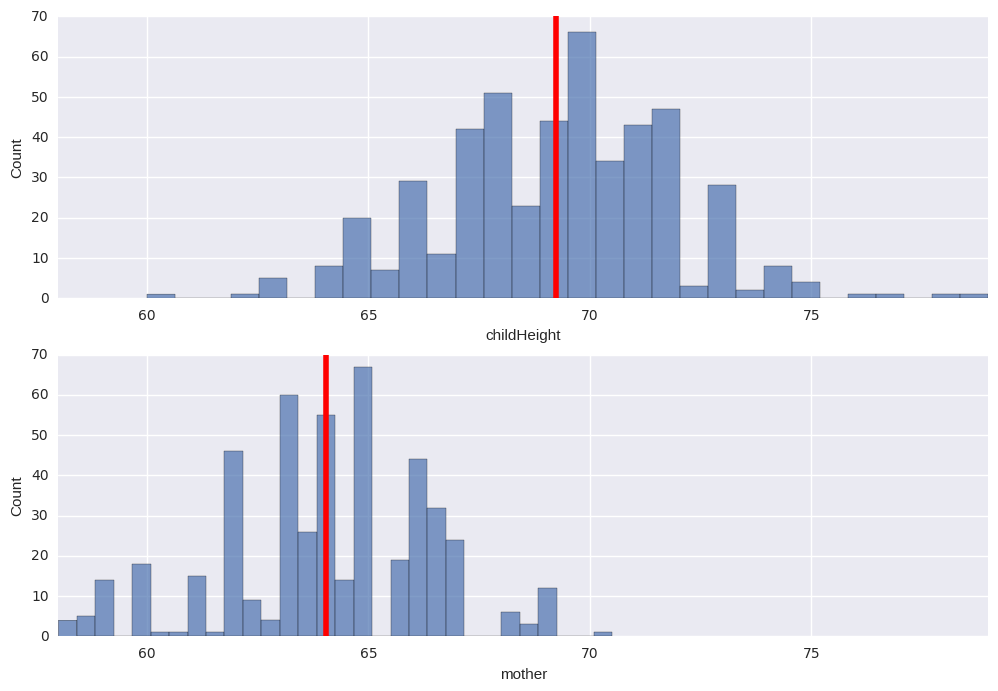

In [13]:
%matplotlib inline
def hist_family(df, col1, col2, num_bins = 30):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    ## Plot the histogram   
    temp = df[col1].as_matrix()
    ax[0].hist(temp, bins = 30, alpha = 0.7)
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean1, color = 'red', linewidth = 4)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col1)
    
    ## Plot the histogram   
    temp = df[col2].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean2, color = 'red', linewidth = 4)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col2)
    
    return [col1, col2]
sons = galton[galton.gender == 'male']
hist_family(sons, 'childHeight', 'mother')

## Seabornì ì¬ì©íì¬ ê·¸ëí ì¶ë ¥

In [16]:
def hist_family_sns(df, col1, col2, num_bins = 30):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    ## Plot the histogram
    plt.subplot(211)
    plot1 = sns.distplot(df[col1], kde=False, bins=num_bins)
    plot1.set(xlim=(mins, maxs))
    plot1.axvline(x=mean1, color = 'red', linewidth = 4)
    
    ## Plot the histogram 
    plt.subplot(212)
    plot2 = sns.distplot(df[col2], kde=False, bins=num_bins)
    plot2.set(xlim=(mins, maxs))
    plot2.axvline(x=mean2, color = 'red', linewidth = 4)
    
    return [col1, col2]

### ìë¤ì ê²½ì°

['childHeight', 'mother']

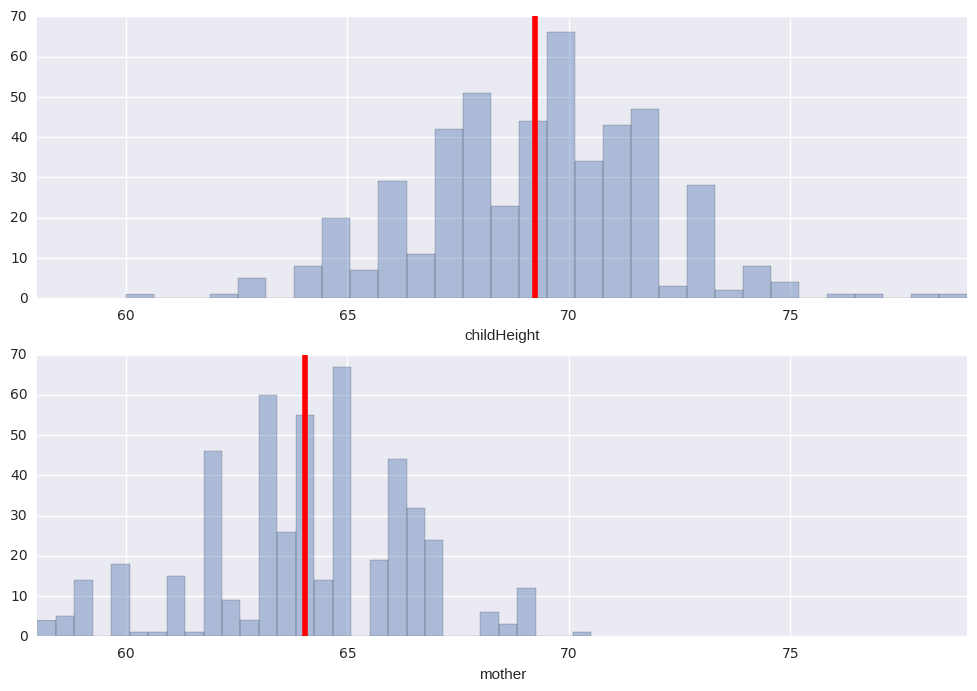

In [20]:
sons = galton[galton.gender == 'male']
hist_family_sns(sons, 'childHeight', 'mother')

### ë¸ì ê²½ì°

['childHeight', 'mother']

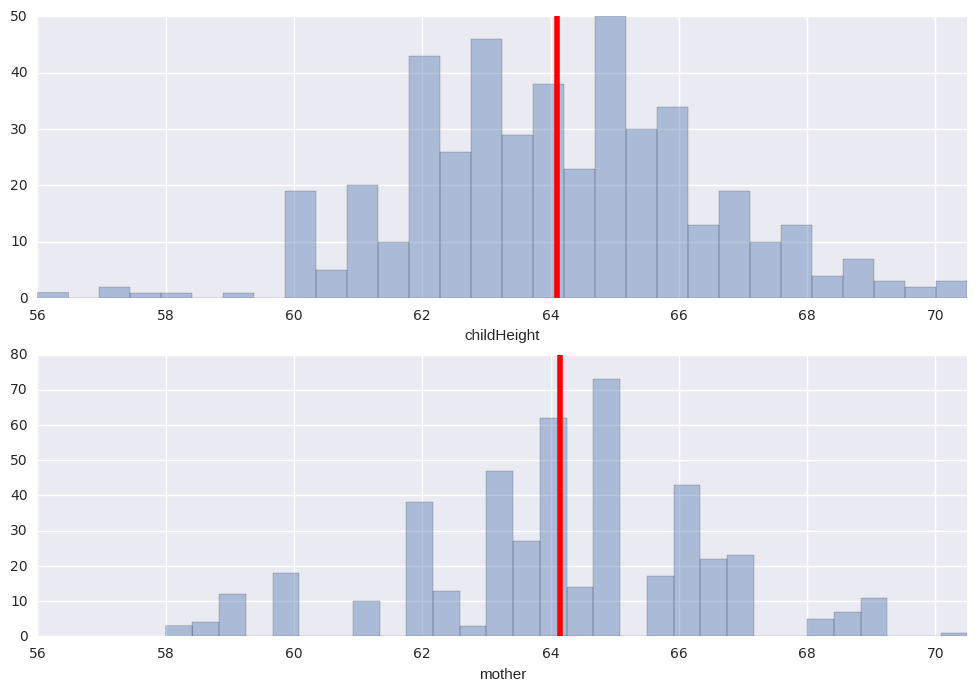

In [19]:
daughters = galton[galton.gender == 'female']
hist_family_sns(daughters, 'childHeight', 'mother')

## T Test

In [26]:
def family_test(df, col1, col2, alpha):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    n, _, diff, var, _, _ = stats.describe(df[col1] - df[col2])
    degfree = n - 1

    temp1 = df[col1].as_matrix()
    temp2 = df[col2].as_matrix()
    res = ss.ttest_rel(temp1, temp2)
      
    means = ws.CompareMeans(ws.DescrStatsW(temp1), ws.DescrStatsW(temp2))
    confint = means.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
    
def hist_family_conf(df, col1, col2, num_bins = 30, alpha =0.05):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    tStat = family_test(df, col1, col2, alpha)
    pv1 = mean2 + tStat[4]    
    pv2 = mean2 + tStat[5]
    
    ## Plot the histogram   
    temp = df[col1].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean1, color = 'red', linewidth = 4)    
    ax[1].axvline(x=pv1, color = 'red', linestyle='--', linewidth = 4)
    ax[1].axvline(x=pv2, color = 'red', linestyle='--', linewidth = 4)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col1)
    
    ## Plot the histogram   
    temp = df[col2].as_matrix()
    ax[0].hist(temp, bins = 30, alpha = 0.7)
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean2, color = 'red', linewidth = 4)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col2)
    
    return tStat

DegFreedom     9.459687e+02
Difference    -5.200832e+00
Statistic     -3.949802e+01
PValue        6.323181e-153
Low95CI       -5.514333e+00
High95CI      -4.887331e+00
dtype: float64

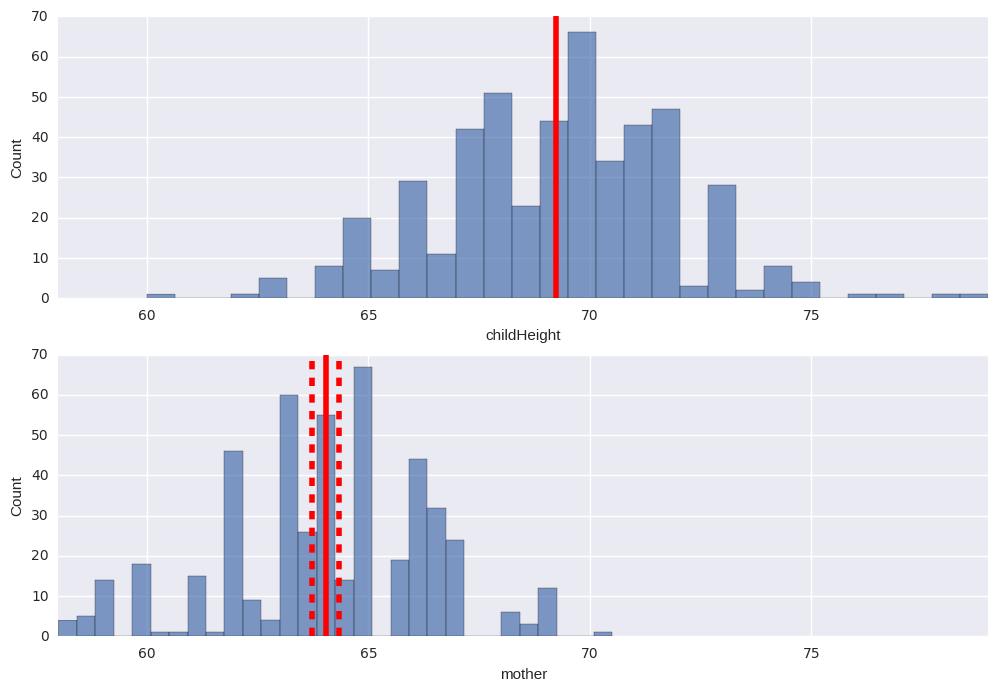

In [27]:
hist_family_conf(sons, 'mother', 'childHeight')

- p value ê°ì´ ë§¤ì° ìê¸°ëë¬¸ì ê·ë¬´ê°ì¤ ê¸°ê°

DegFreedom    902.412325
Difference      0.044812
Statistic       0.350524
PValue          0.726109
Low95CI        -0.256132
High95CI        0.345756
dtype: float64

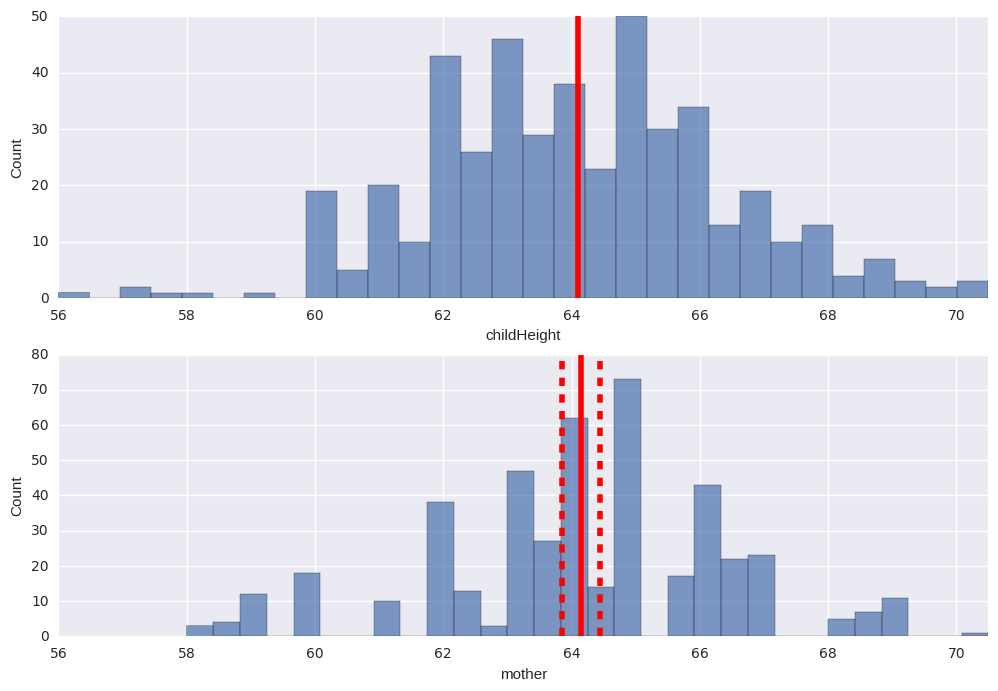

In [25]:
hist_family_conf(daughters, 'mother', 'childHeight')

- p value ê°ì´ 0.05 ë³´ë¤ í¬ê¸° ëë¬¸ì ê·ë¬´ê°ì¤ ì±í